In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj

In [2]:
data = "../ProjetoIntegrador1/Data/Real_State_Properati.csv"

data_Frame = pd.read_csv(data, sep = '\t')
print('rows',len(data_Frame))
print('columns',len(data_Frame.columns))
data_Frame

rows 17223
columns 9


,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


In [3]:
bairros = pd.read_csv(r"C:\Users\RedRagon\Downloads\EstudosDigitalHouse\GeoPandas\Data\Neighborhoods.csv", encoding = 'latin1')
bairros.head()

,WKT,NEIGHBORHOOD,COMMUNE,PERIMETER,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [4]:
bairros.dtypes

WKT              object
NEIGHBORHOOD     object
COMMUNE         float64
PERIMETER       float64
AREA            float64
dtype: object

In [5]:
import shapely.wkt

bairros["WKT"] = bairros["WKT"].apply(shapely.wkt.loads) 

geo_bairros = gpd.GeoDataFrame(bairros, 
                               geometry = 'WKT'
                              )

In [6]:
type(geo_bairros)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

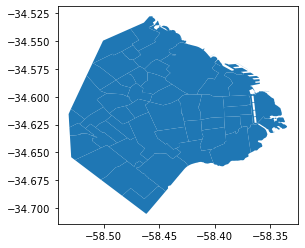

In [7]:
geo_bairros.plot()

In [8]:
is_null_result = data_Frame.isnull()
quantidade_nulls = is_null_result.sum()
print(quantidade_nulls)

property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
lon                    0
price                  0
currency               0
surface_total_in_m2    0
dtype: int64


In [10]:
data_Frame_USD = data_Frame[data_Frame.currency == 'USD']
len(data_Frame_USD)/len(data_Frame.index)*100

data_Frame_nUSD = data_Frame[data_Frame.currency != 'USD']
len(data_Frame_nUSD)/len(data_Frame.index)*100

3.0366370551007376

In [11]:
data_Frame_nUSD

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
58,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1099350.0,ARS,27.0
59,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1113420.0,ARS,27.0
60,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1127700.0,ARS,27.0
61,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1141980.0,ARS,27.0
62,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1327515.0,ARS,32.0
...,...,...,...,...,...,...,...,...,...
16977,apartment,Villa Urquiza,Argentina,Capital Federal,-34.573427,-58.473572,2337233.0,ARS,45.0
17021,apartment,Belgrano,Argentina,Capital Federal,-34.564408,-58.437251,650000.0,ARS,132.0
17113,apartment,Villa Crespo,Argentina,Capital Federal,-34.597679,-58.443019,2960000.0,ARS,53.0
17165,apartment,Coghlan,Argentina,Capital Federal,-34.558708,-58.486731,2651200.0,ARS,70.0


- Código de baixo é uma função para transformar a moeda ARS em USD

In [12]:
price_usd = round(data_Frame.apply(lambda x: x["price"] if x["currency"] == "USD" else x["price"]/117.41,axis=1),1)

In [13]:
print(type(price_usd))
print("Número de elementos em preco_m2: " + str(len(price_usd)))
print("Quantidade de linhas em data: " + str(data_Frame.shape[0]))

<class 'pandas.core.series.Series'>
Número de elementos em preco_m2: 17223
Quantidade de linhas em data: 17223


In [14]:
data_Frame.head(3)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0


In [15]:
data_Frame_nUSD.head(3)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
58,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1099350.0,ARS,27.0
59,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1113420.0,ARS,27.0
60,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1127700.0,ARS,27.0


- Código para criar uma coluna chama "preço em USD"

In [16]:
dataPH = data_Frame[data_Frame.property_type == "PH"]
dataPH

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
22,PH,Barracas,Argentina,Capital Federal,-34.650450,-58.382404,160000.0,USD,156.0
24,PH,Palermo,Argentina,Capital Federal,-34.585483,-58.428493,315000.0,USD,240.0
42,PH,Almagro,Argentina,Capital Federal,-34.569107,-58.408490,165000.0,USD,85.0
...,...,...,...,...,...,...,...,...,...
17169,PH,Belgrano,Argentina,Capital Federal,-34.573783,-58.442427,255000.0,USD,110.0
17179,PH,Villa Crespo,Argentina,Capital Federal,-34.605780,-58.460082,144900.0,USD,90.0
17182,PH,Velez Sarsfield,Argentina,Capital Federal,-34.629798,-58.495002,85000.0,USD,75.0
17183,PH,Floresta,Argentina,Capital Federal,-34.629798,-58.495002,85000.0,USD,75.0


In [17]:
data_Frame["preço em USD"] = price_usd

In [18]:
dataARS = data_Frame[data_Frame.currency == "ARS"]

In [19]:
dataARS

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,preço em USD
58,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1099350.0,ARS,27.0,9363.3
59,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1113420.0,ARS,27.0,9483.2
60,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1127700.0,ARS,27.0,9604.8
61,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1141980.0,ARS,27.0,9726.4
62,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1327515.0,ARS,32.0,11306.7
...,...,...,...,...,...,...,...,...,...,...
16977,apartment,Villa Urquiza,Argentina,Capital Federal,-34.573427,-58.473572,2337233.0,ARS,45.0,19906.6
17021,apartment,Belgrano,Argentina,Capital Federal,-34.564408,-58.437251,650000.0,ARS,132.0,5536.2
17113,apartment,Villa Crespo,Argentina,Capital Federal,-34.597679,-58.443019,2960000.0,ARS,53.0,25210.8
17165,apartment,Coghlan,Argentina,Capital Federal,-34.558708,-58.486731,2651200.0,ARS,70.0,22580.7


In [20]:
data_Frame

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,preço em USD
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,62000.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,72000.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,138000.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,195000.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,239000.0
...,...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0,165000.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0,165000.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0,410000.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0,410000.0


- Depois que deixamos tudo em USD, dropamos a coluna "price" que está com a moeda ARS, dropamos também a coluna "currency" porque não precisa pois está todos os preços em USD, além também da coluna "state_name" pois todos os lugares estão no mesmo estado

In [21]:
Data = data_Frame.drop(["price","currency","state_name"],axis =1 )

In [22]:
Data

,property_type,place_name,country_name,lat,lon,surface_total_in_m2,preço em USD
0,PH,Mataderos,Argentina,-34.661824,-58.508839,55.0,62000.0
1,apartment,Mataderos,Argentina,-34.652262,-58.522982,55.0,72000.0
2,apartment,Belgrano,Argentina,-34.559873,-58.443362,45.0,138000.0
3,apartment,Belgrano,Argentina,-34.559873,-58.443362,65.0,195000.0
4,PH,Mataderos,Argentina,-34.652356,-58.501624,140.0,239000.0
...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,-34.599214,-58.402519,91.0,165000.0
17219,apartment,Recoleta,Argentina,-34.587425,-58.397372,44.0,165000.0
17220,apartment,Belgrano,Argentina,-34.563685,-58.442683,157.0,410000.0
17221,apartment,Belgrano,Argentina,-34.563685,-58.442683,157.0,410000.0


In [23]:
barrios = Data.place_name

In [24]:
type(barrios)

pandas.core.series.Series

In [25]:
geometry = gpd.points_from_xy(Data.lon, 
                              Data.lat)

In [26]:
geo_arg = gpd.GeoDataFrame(Data, 
                           geometry = geometry
                          )
geo_arg

,property_type,place_name,country_name,lat,lon,surface_total_in_m2,preço em USD,geometry
0,PH,Mataderos,Argentina,-34.661824,-58.508839,55.0,62000.0,POINT (-58.50884 -34.66182)
1,apartment,Mataderos,Argentina,-34.652262,-58.522982,55.0,72000.0,POINT (-58.52298 -34.65226)
2,apartment,Belgrano,Argentina,-34.559873,-58.443362,45.0,138000.0,POINT (-58.44336 -34.55987)
3,apartment,Belgrano,Argentina,-34.559873,-58.443362,65.0,195000.0,POINT (-58.44336 -34.55987)
4,PH,Mataderos,Argentina,-34.652356,-58.501624,140.0,239000.0,POINT (-58.50162 -34.65236)
...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,-34.599214,-58.402519,91.0,165000.0,POINT (-58.40252 -34.59921)
17219,apartment,Recoleta,Argentina,-34.587425,-58.397372,44.0,165000.0,POINT (-58.39737 -34.58743)
17220,apartment,Belgrano,Argentina,-34.563685,-58.442683,157.0,410000.0,POINT (-58.44268 -34.56369)
17221,apartment,Belgrano,Argentina,-34.563685,-58.442683,157.0,410000.0,POINT (-58.44268 -34.56369)


In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [28]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [29]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [30]:
world[world['name'] == 'Argentina']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


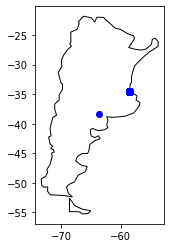

In [31]:
# Mapa da argentina
ax = world[world.name == 'Argentina'].plot(color = 'white', 
                                        edgecolor = 'black'
                                       )

# Sobre as cidades se sobrepõem o mapa do país
geo_arg.plot(ax = ax, 
             color = 'blue'
            )

plt.show()

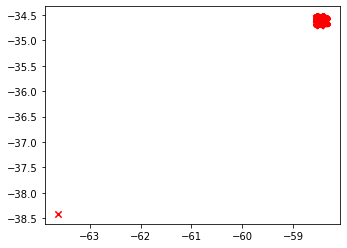

In [32]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

geo_bairros.plot(ax = ax, 
                 color = 'white', 
                 edgecolor = 'black'
                )

geo_arg.plot(ax = ax, 
            marker = 'x', 
            color = 'red', 
            markersize = 40
           )

plt.show();

In [33]:
Dataa = Data[Data.lat>38]

In [34]:
geo_arg.plot(ax = ax, 
            marker = 'x', 
            color = 'red', 
            markersize = 40
           )



<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

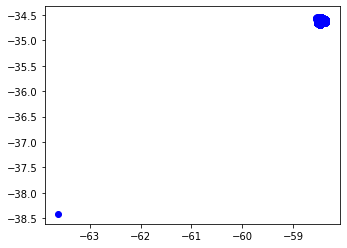

In [35]:
# Mapa de buenos aires
ax = geo_bairros.plot(color = 'black', 
                    edgecolor = 'black'
                                       )

# Sobre as cidades se sobrepõem o mapa do país
geo_arg.plot(ax = ax, 
             color = 'blue'
            )

plt.show()

In [42]:
Dataa = Data[Data.surface_total_in_m2>10000]
Dataa

,property_type,place_name,country_name,lat,lon,surface_total_in_m2,preço em USD,geometry,preço por m2 em USD
3479,apartment,San Telmo,Argentina,-34.621342,-58.374185,200000.0,46545445.0,POINT (-58.37418 -34.62134),232.727225
11088,store,Villa Soldati,Argentina,-34.660122,-58.430251,10958.0,8500000.0,POINT (-58.43025 -34.66012),775.688994


In [45]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [51]:
Data

,property_type,place_name,country_name,lat,lon,surface_total_in_m2,preço em USD,geometry,preço por m2 em USD
0,PH,Mataderos,Argentina,-34.661824,-58.508839,55.0,62000.0,POINT (-58.50884 -34.66182),1127.272727
1,apartment,Mataderos,Argentina,-34.652262,-58.522982,55.0,72000.0,POINT (-58.52298 -34.65226),1309.090909
2,apartment,Belgrano,Argentina,-34.559873,-58.443362,45.0,138000.0,POINT (-58.44336 -34.55987),3066.666667
3,apartment,Belgrano,Argentina,-34.559873,-58.443362,65.0,195000.0,POINT (-58.44336 -34.55987),3000.000000
4,PH,Mataderos,Argentina,-34.652356,-58.501624,140.0,239000.0,POINT (-58.50162 -34.65236),1707.142857
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,-34.599214,-58.402519,91.0,165000.0,POINT (-58.40252 -34.59921),1813.186813
17219,apartment,Recoleta,Argentina,-34.587425,-58.397372,44.0,165000.0,POINT (-58.39737 -34.58743),3750.000000
17220,apartment,Belgrano,Argentina,-34.563685,-58.442683,157.0,410000.0,POINT (-58.44268 -34.56369),2611.464968
17221,apartment,Belgrano,Argentina,-34.563685,-58.442683,157.0,410000.0,POINT (-58.44268 -34.56369),2611.464968


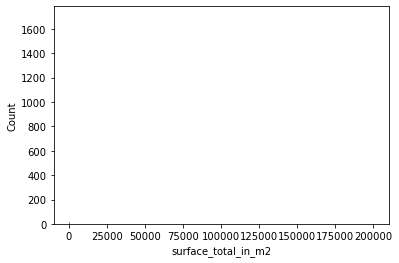

In [58]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = Data, x = "surface_total_in_m2")

plt.show()

In [60]:
Data.sort_values(by = "preço por m2 em USD").tail(10)

,property_type,place_name,country_name,lat,lon,surface_total_in_m2,preço em USD,geometry,preço por m2 em USD
3647,apartment,Boedo,Argentina,-34.622837,-58.420510,37.0,1202000.0,POINT (-58.42051 -34.62284),32486.486486
3020,apartment,Recoleta,Argentina,-34.593267,-58.412733,10.0,330000.0,POINT (-58.41273 -34.59327),33000.000000
3678,apartment,Boedo,Argentina,-34.626657,-58.424113,58.0,2003000.0,POINT (-58.42411 -34.62666),34534.482759
3683,apartment,Saavedra,Argentina,-34.553189,-58.482659,49.0,1744000.0,POINT (-58.48266 -34.55319),35591.836735
3649,apartment,Flores,Argentina,-34.626440,-58.459419,37.0,1324000.0,POINT (-58.45942 -34.62644),35783.783784
9293,apartment,Flores,Argentina,-34.617122,-58.467658,37.0,1476285.0,POINT (-58.46766 -34.61712),39899.594595
9292,apartment,Flores,Argentina,-34.617122,-58.467658,69.0,2809708.0,POINT (-58.46766 -34.61712),40720.405797
15399,apartment,Palermo,Argentina,-34.583276,-58.426027,10.0,436400.0,POINT (-58.42603 -34.58328),43640.000000
15398,apartment,Palermo,Argentina,-34.583276,-58.426027,10.0,449000.0,POINT (-58.42603 -34.58328),44900.000000
3901,apartment,Boedo,Argentina,-34.622204,-58.416089,33.0,6809000.0,POINT (-58.41609 -34.62220),206333.333333


In [66]:
print(Data["place_name"].unique())

['Mataderos' 'Belgrano' 'Palermo' 'Flores' 'Boedo' 'Las Cañitas'
 'Puerto Madero' 'Balvanera' 'Caballito' 'Nuñez' 'Floresta' 'Barracas'
 'Recoleta' 'Congreso' 'Villa Crespo' 'Chacarita' 'Almagro' 'Constitución'
 'Colegiales' 'Villa Urquiza' 'Barrio Norte' 'Palermo Hollywood'
 'Saavedra' 'Paternal' 'Agronomía' 'Villa Pueyrredón' 'Coghlan'
 'Parque Centenario' 'San Telmo' 'Monserrat' 'Boca' 'Parque Avellaneda'
 'San Cristobal' 'Abasto' 'Versalles' 'Villa del Parque' 'Monte Castro'
 'Retiro' 'Capital Federal' 'Parque Chas' 'Palermo Chico' 'Villa Devoto'
 'Palermo Soho' 'Centro / Microcentro' 'Liniers' 'Tribunales' 'Once'
 'San Nicolás' 'Parque Chacabuco' 'Velez Sarsfield' 'Catalinas' 'Pompeya'
 'Parque Patricios' 'Palermo Viejo' 'Villa Lugano' 'Villa Luro'
 'Villa General Mitre' 'Villa Ortuzar' 'Villa Santa Rita' 'Villa Soldati'
 'Villa Real' 'Villa Riachuelo']


In [73]:
DataMataderos = Data[Data.place_name == "Mataderos"]
DataBelgrano = Data[Data.place_name == "Belgrano"]
DataPalermo = Data[Data.place_name == "Palermo"]
DataFlores = Data[Data.place_name == "Flores"]
DataBoedo = Data[Data.place_name == "Boedo"]
DataLasCanitas = Data[Data.place_name == "Las Cañitas"]
DataPuertoMadero = Data[Data.place_name == "Caballito"]
DataCaballito = Data[Data.place_name == "Balvanera"]
DataNunez = Data[Data.place_name == "Nuñez"]
DataFloresta = Data[Data.place_name == "Floresta"]
DataBarracas = Data[Data.place_name == "Barracas"]
DataRecoleta = Data[Data.place_name == "Recoleta"]
DataCongreso = Data[Data.place_name == "Congreso"]
DataVillaCrespo = Data[Data.place_name == "Villa Crespo"]
DataBarrioNorte = Data[Data.place_name == "Barrio Norte"]
DataPalermoHollywood = Data[Data.place_name == "Palermo Hollywood"]
DataSaavedra = Data[Data.place_name == "Saavedra"]
DataPaternal = Data[Data.place_name == "Paternal"]
DataAgronomia = Data[Data.place_name == "Agronomía"]
DataVillaPueyrredon = Data[Data.place_name == "Villa Pueyrredón"]
DataCoghlan = Data[Data.place_name == "Coghlano"]
DataAgronomia 

,property_type,place_name,country_name,lat,lon,surface_total_in_m2,preço em USD,geometry,preço por m2 em USD
79,apartment,Agronomía,Argentina,-34.592470,-58.494404,56.0,140000.0,POINT (-58.49440 -34.59247),2500.000000
855,PH,Agronomía,Argentina,-34.592740,-58.491950,120.0,165000.0,POINT (-58.49195 -34.59274),1375.000000
1575,apartment,Agronomía,Argentina,-34.594366,-58.494954,57.0,135000.0,POINT (-58.49495 -34.59437),2368.421053
4587,apartment,Agronomía,Argentina,-34.590561,-58.480257,41.0,95000.0,POINT (-58.48026 -34.59056),2317.073171
4974,apartment,Agronomía,Argentina,-34.598760,-58.480924,70.0,130000.0,POINT (-58.48092 -34.59876),1857.142857
7046,PH,Agronomía,Argentina,-34.592470,-58.494404,185.0,245000.0,POINT (-58.49440 -34.59247),1324.324324
7112,apartment,Agronomía,Argentina,-34.586290,-58.471404,64.0,124700.0,POINT (-58.47140 -34.58629),1948.437500
7113,apartment,Agronomía,Argentina,-34.586290,-58.471404,64.0,130700.0,POINT (-58.47140 -34.58629),2042.187500
9089,apartment,Agronomía,Argentina,-34.585972,-58.490251,47.0,124000.0,POINT (-58.49025 -34.58597),2638.297872
9319,apartment,Agronomía,Argentina,-34.598935,-58.483863,64.0,140000.0,POINT (-58.48386 -34.59893),2187.500000


In [37]:
preco_m2 = Data.apply(lambda x: 0 if x.surface_total_in_m2 ==0.0 else x["preço em USD"]/x.surface_total_in_m2, axis = 1)
preco_m2

0        1127.272727
1        1309.090909
2        3066.666667
3        3000.000000
4        1707.142857
            ...     
17218    1813.186813
17219    3750.000000
17220    2611.464968
17221    2611.464968
17222    2858.695652
Length: 17223, dtype: float64

In [38]:
Data["preço por m2 em USD"] = preco_m2

In [ ]:
Data

In [ ]:
Data["preço por m2 em USD"].mean()

In [ ]:
Data["preço por m2 em USD"].std()

In [ ]:
Data["surface_total_in_m2"].mean()

In [ ]:
Data["surface_total_in_m2"].std()

In [ ]:
Data["surface_total_in_m2"].max()

In [ ]:
a = Data[Data["surface_total_in_m2"]==0]
a

In [ ]:
b = Data[Data["surface_total_in_m2"]>1000]
b